# Đọc chuỗi thời gian

1) Cung cấp một vài câu lệnh đọc chuỗi thời gian vào chương trình để thực hiện phân tích  

2) Vẽ hình

3) Tạo bảng chuỗi thời gian với dữ liệu ngày tháng năm và dữ liệu ban đầu t, t-1, t-2

In [ ]:
# Đọc chuỗi thời gian
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Chuỗi thời gian/Tuần 1/daily-total-female-births.csv')
df['Date'] = pd.to_datetime(df['Date']).dt.strftime('%Y-%m-%d')


In [ ]:
#Đọc 5 dữ liệu đầu tiên của chuỗi thời gian
df.head(5)

,Date,Births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [ ]:
# Mô tả chuỗi thời gian với số lượng dữ liệu, kỳ vọng (mean), độ lệch tiêu chuẩn (std), min, max và phân vị mức  0,25; 0,5; 0,75
df.describe()

,Births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


In [ ]:
dt=pd.Series(df.Births.to_list(),index=df.Date.to_list(), name="Thu")

In [ ]:
dt.head(5)

1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
Name: Thu, dtype: int64

In [ ]:
#Kích thước của chuỗi
print(dt.size)

365


In [ ]:
#Lấy một điểm dữ liệu
dt['1959-05-03']

38

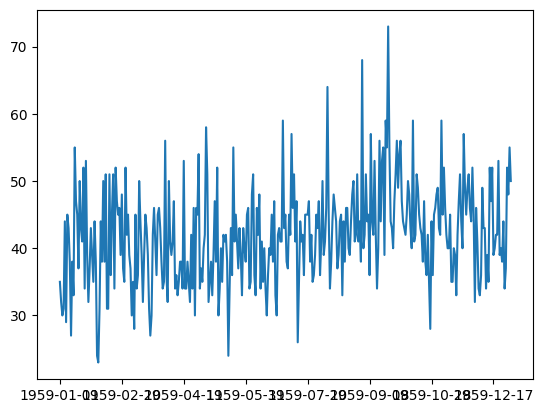

In [ ]:
#Vẽ đồ thị chuỗi thời gian
import matplotlib.pyplot as plt
dt.plot()
plt.show()

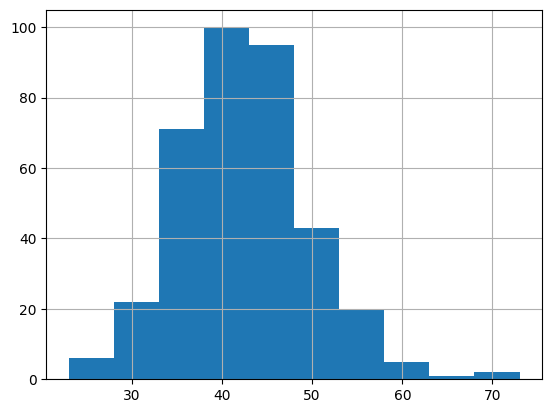

In [ ]:
#Vẽ biểu đồ hist thực nghiệm của dữ liệu
dt.hist()
plt.show()

In [ ]:
dt

1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
              ..
1959-12-27    37
1959-12-28    52
1959-12-29    48
1959-12-30    55
1959-12-31    50
Name: Thu, Length: 365, dtype: int64

In [ ]:
import datetime
dataframe = pd.DataFrame()
dataframe['year'] = [datetime.datetime.strptime(dt.index[i], '%Y-%m-%d').year  for i in range(len(dt))]
dataframe['month'] = [datetime.datetime.strptime(dt.index[i], '%Y-%m-%d').month  for i in range(len(dt))]
dataframe['day'] = [datetime.datetime.strptime(dt.index[i], '%Y-%m-%d').day for i in range(len(dt))]
dataframe['t'] = [dt[i] for i in range(len(dt))]
dataframe['t-1']=dataframe['t'].shift(1)
dataframe['t-2']=dataframe['t'].shift(2)
print(dataframe.head(5))

   year  month  day   t   t-1   t-2
0  1959      1    1  35   NaN   NaN
1  1959      1    2  32  35.0   NaN
2  1959      1    3  30  32.0  35.0
3  1959      1    4  31  30.0  32.0
4  1959      1    5  44  31.0  30.0


# Ví dụ 2

1) Chọn một tập dữ liệu chuỗi thời gian từ bất cứ nguồn nào hoặc tự tạo ra  <br>
2) Vẽ đồ thị <br>
3) Tách ra được các thành phần trend, seasonal, residual

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [ ]:
data =pd.read_csv('/content/drive/MyDrive/Chuỗi thời gian/Tuần 1/data.csv', sep=",", parse_dates=["datetime"])
data["datetime"] = data["datetime"].dt.date
data.set_index("datetime", inplace=True)
data = data.asfreq("D")
data

,value
datetime,
2014-01-01,620107.7
2014-01-02,659865.2
2014-01-03,632536.8
2014-01-04,610251.7
2014-01-05,572534.1
...,...
2018-12-26,649103.9
2018-12-27,639571.2
2018-12-28,602541.7


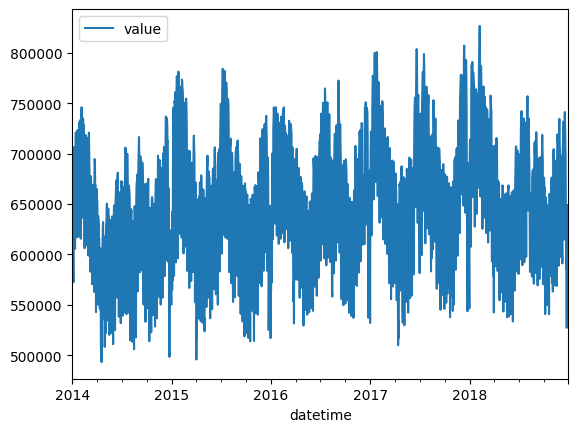

In [ ]:
data.plot()
plt.show()

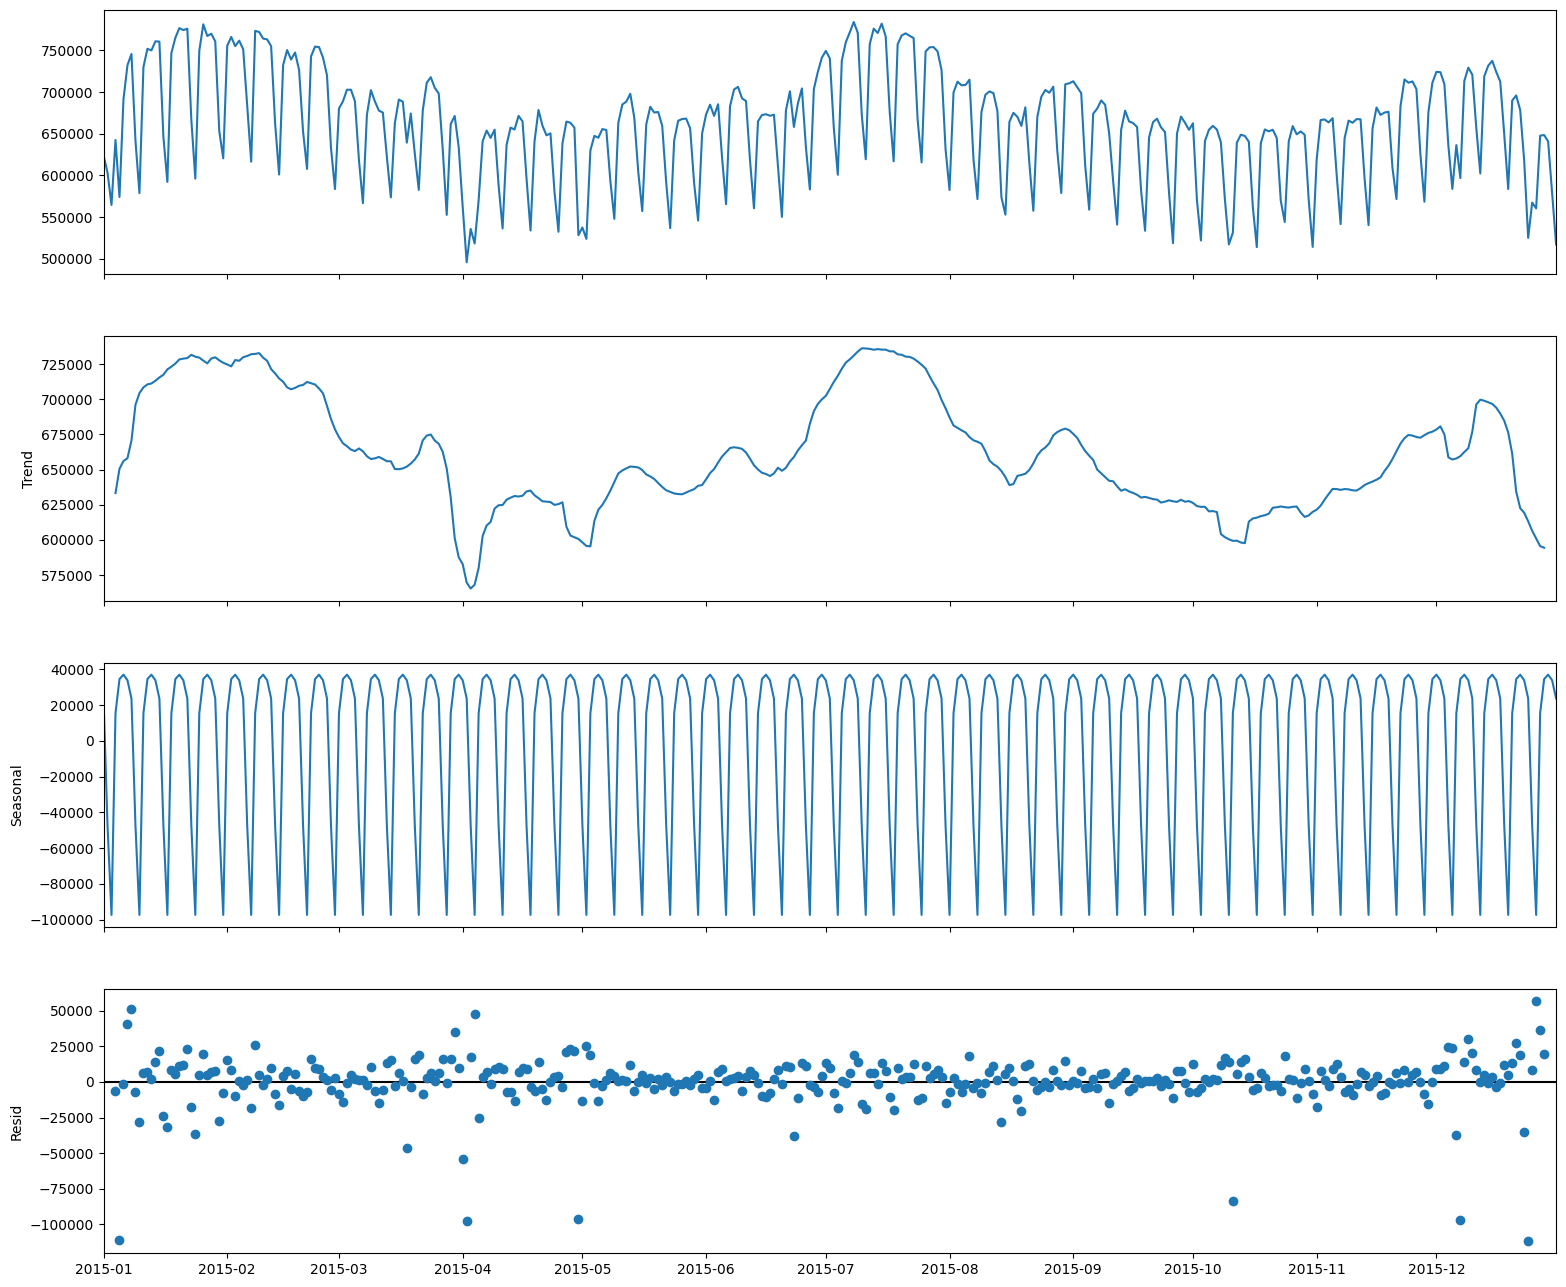

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data.loc["2015"], model='additive')
fig = result.plot()
fig.set_size_inches(18, 14)

Bài tập về nhà:
 Cho bộ dữ liệu chất lượng không khí ở phần Dữ liệu gồm thông tin về chất lượng không khí theo ngày ở New York. Các biến gồm nhiều chỉ số chất lượng không khí.
(a) Tải tập dữ liệu vào môi trường python.

(b) Xét cấu trúc của tập dữ liệu.

(c) Vẽ đồ thị cho từng chuỗi có thể trong số bốn chuỗi

(d) Nhận xét và phân tích về chuỗi thời gian

# 1. Tải tập dữ liệu vào môi trường Python

In [2]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
data = pd.read_csv('/content/drive/MyDrive/Chuỗi thời gian/Tuần 1/demand_forecast.csv')
data['Date'] = pd.to_datetime(data['Date']).dt.strftime('%Y-%m-%d')
data.head(5)

,Date,Demand
0,2020-01-01,7748
1,2020-01-02,9470
2,2020-01-03,5927
3,2020-01-04,6577
4,2020-01-05,6503


## 2. Xét cấu trúc của tập dữ liệu


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    366 non-null    object
 1   Demand  366 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


In [18]:
data.describe()

,Demand
count,366.000000
mean,7528.428962
std,1404.882975
min,5015.000000
25%,6344.750000
50%,7557.000000
75%,8722.500000
max,9996.000000


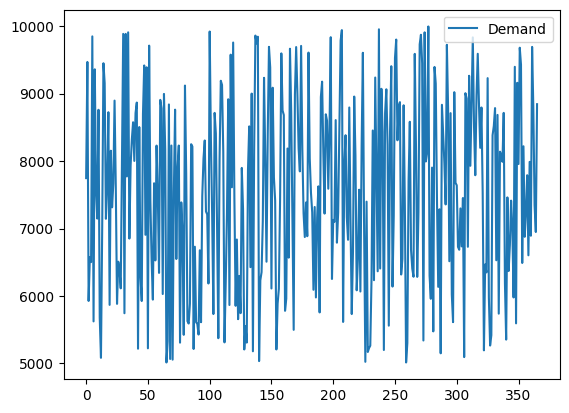

In [19]:
#Vẽ đồ thị chuỗi thời gian
import matplotlib.pyplot as plt
data.plot()
plt.show()

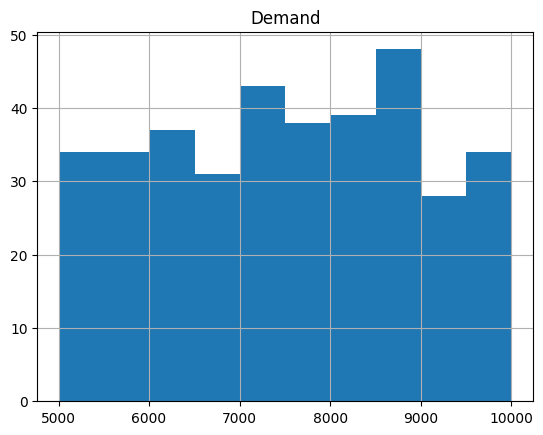

In [20]:
#Vẽ biểu đồ historgram của dữ liệu
data.hist()
plt.show()

# 3. Vẽ đồ thị cho từng chuỗi

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [22]:
data = pd.read_csv('/content/drive/MyDrive/Chuỗi thời gian/Tuần 1/demand_forecast.csv', sep=",", parse_dates=["Date"])
data["Date"] = data["Date"].dt.date
data.set_index("Date", inplace=True)
data = data.asfreq("D")
data

,Demand
Date,
2020-01-01,7748
2020-01-02,9470
2020-01-03,5927
2020-01-04,6577
2020-01-05,6503
...,...
2020-12-27,9693
2020-12-28,8771
2020-12-29,7347


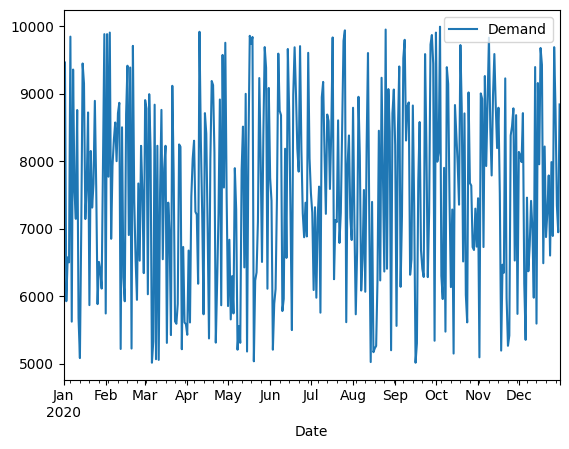

In [26]:
data.plot()
plt.show()

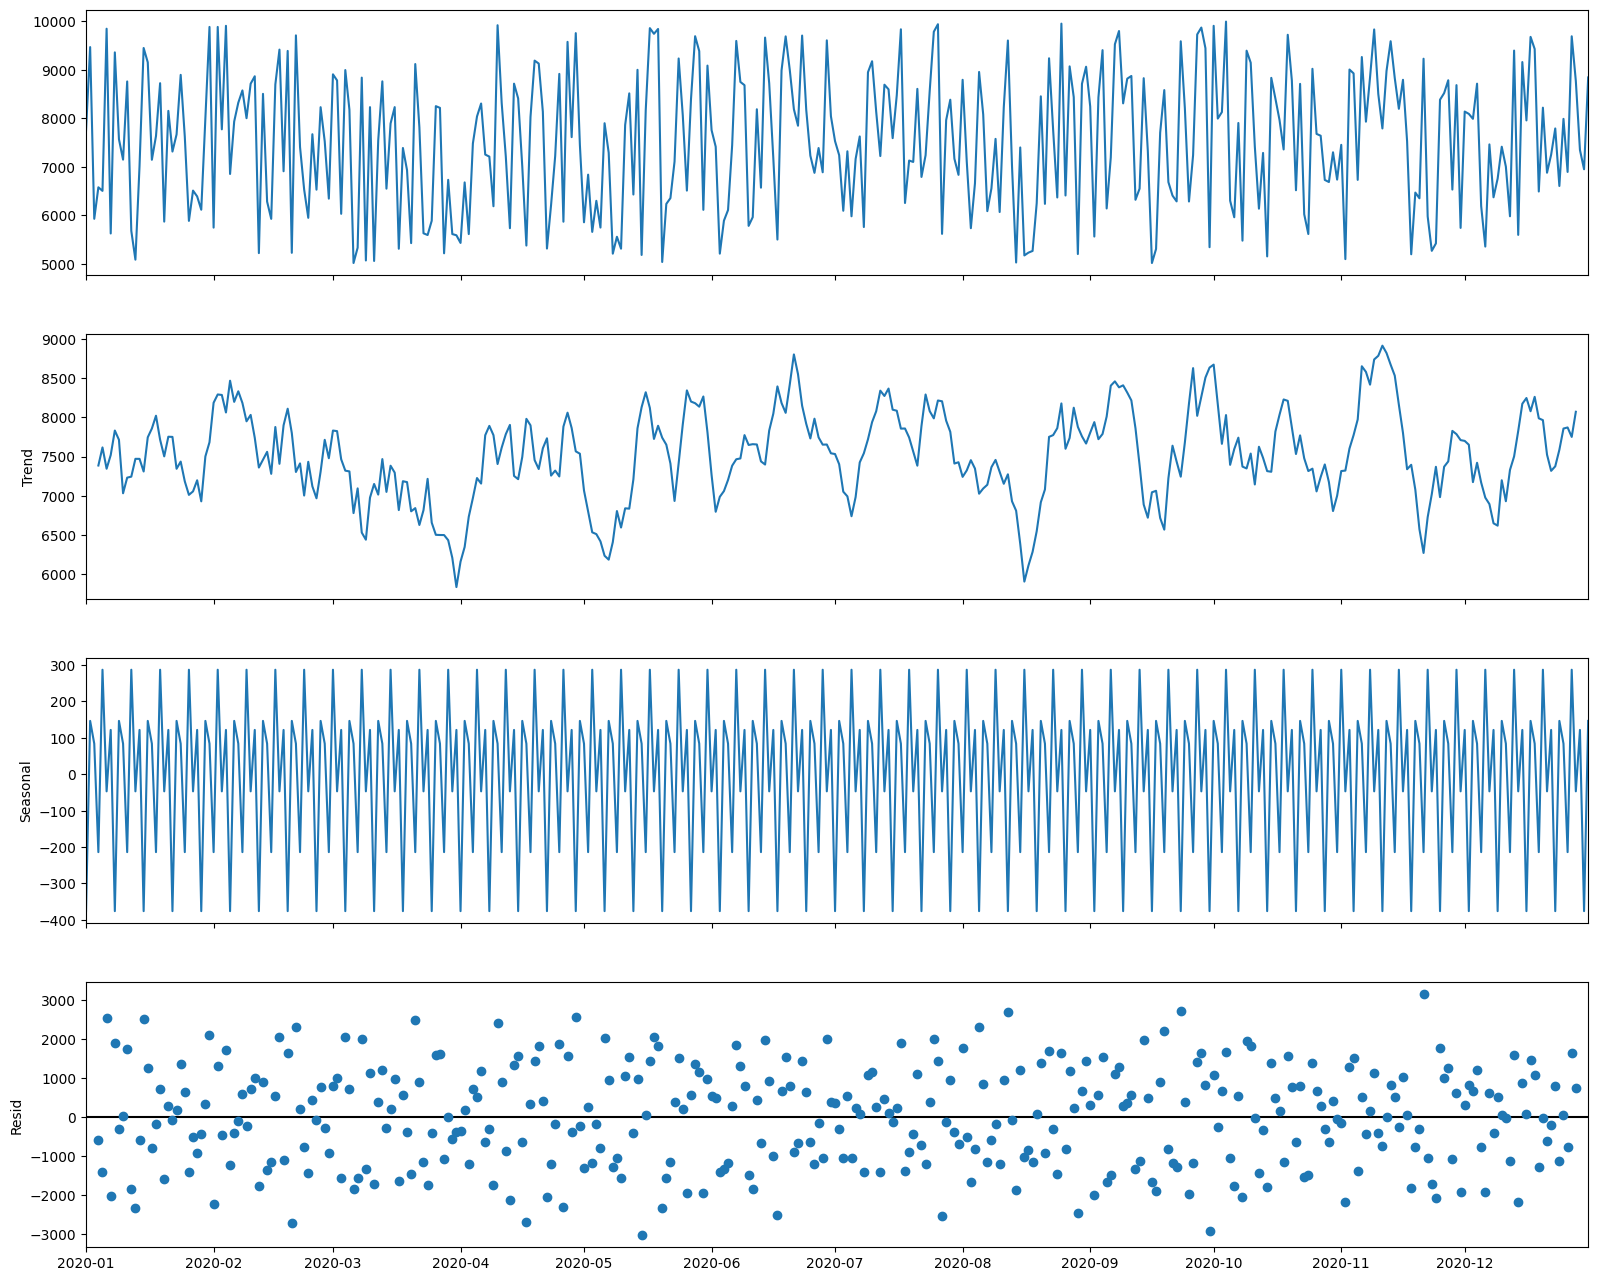

In [28]:
result = seasonal_decompose(data.loc["2020"], model='additive')
fig = result.plot()
fig.set_size_inches(18, 14)

*  Thành phần xu hướng không thay đổi, cho thấy nhu cầu không tăng hoặc giảm trong thời gian 1 năm. Điều này phù hợp với mô phỏng dữ liệu tuyến tính không có xu hướng.
*  Không có thành phần seasonal được quan sát. Dữ liệu không thể hiện bất kỳ mô hình seasonal hoặc theo chu kỳ định kỳ nào. (nói cách khác là dữ liệu khá đẹp)
*  Thành phần residual là nhiễu trắng, dao động ngẫu nhiên xung quanh giá trị trung bình bằng 0. Điều này cho thấy tính ngẫu nhiên thúc đẩy sự thay đổi về nhu cầu hơn là các yếu tố mang tính hệ thống.

*  Sự vắng mặt của các thành phần trend và seasonal cho thấy các phương pháp tính trung bình đơn giản có thể hoạt động tốt cho các dự đoán ngắn hạn.